In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession, functions, types
spark = SparkSession.builder.appName('Players').getOrCreate()


In [3]:
df = spark.read.csv('Downloads/data.csv')

In [58]:
df = df.withColumn('_c2',df['_c2'].cast(types.IntegerType())) #corners
df = df.withColumn('_c3',df['_c3'].cast(types.IntegerType())) #fouls
df = df.withColumn('_c4',df['_c4'].cast(types.IntegerType())) #freekicks
df = df.withColumn('_c5',df['_c5'].cast(types.IntegerType())) #goals
df_a = df.select('_c2','_c3','_c4','_c5')
pddf = df_a.toPandas()

pddf.corr()

,_c2,_c3,_c4,_c5
_c2,1.000000,-0.038678,-0.002243,0.040813
_c3,-0.038678,1.000000,0.257484,-0.075817
_c4,-0.002243,0.257484,1.000000,-0.035029
_c5,0.040813,-0.075817,-0.035029,1.000000


In [45]:
df.show(n=3)

+--------------------+--------------------+------------+----------+--------------+----------+----------+------------+-------------------+--------------------+-------------+----------------+--------------+--------------+--------------+---------------+----------------+-------------+--------------------+-------------+-------------+--------------+-------------+-----------------+--------------+--------------------+--------------------+------------------+-----------------+----------+-------+--------------------+---------------+------------+----------+--------------+----------+---------------+------------+-------------------+---------------+--------------+---------------+--------------+--------------+--------------+--------------+-------------+--------------------+---------------+--------------------+-------------+-------------+--------------+--------------+-----------------+--------------+--------------------+--------------------+------------------+-----------------+----------------+--------

In [4]:
all_teams= []
team_names = df.select('_c6').distinct().collect()
for i in range(0,len(team_names)-1):
    all_teams.append(team_names[i][0])

In [5]:
teams = df.select('_c6','_c61').distinct()
teams = teams.groupBy('_c61').agg(functions.count(teams._c6).alias('total_teams_in_each_league'))
#teams = teams.filter(teams._c61 == 'Primera División')
#teams.show(truncate=False)
teams.show()

+----------------+--------------------------+
|            _c61|total_teams_in_each_league|
+----------------+--------------------------+
|         Serie A|                        38|
|  Premier League|                        39|
|            null|                         0|
|Primera División|                        41|
|      Bundesliga|                        35|
|          league|                         1|
|         Ligue 1|                        40|
+----------------+--------------------------+



In [6]:
#league = df.select('_c61',functions.substring(df._c29,-4,4).alias('_c29'),'_c5','_c36')
league = df.select('_c61','_c64','_c5','_c36')
#league.show()

In [26]:
league_agg1 = league.groupBy('_c61','_c64').agg(functions.sum('_c5').alias('sum_c5'))
league_agg2 = league.groupBy('_c61','_c64').agg(functions.sum('_c36').alias('sum_c36'))
league_agg2 = league_agg2.withColumnRenamed('_c61','new_c61')
league_agg2 = league_agg2.withColumnRenamed('_c64','new_c64')
league_agg = league_agg1.join(league_agg2,[league_agg1._c61 == league_agg2.new_c61,league_agg1._c64 == league_agg2.new_c64])
league_agg = league_agg.withColumn('total', sum(league_agg[col] for col in ['sum_c5','sum_c36']))
league_agg = league_agg.drop('new_c61','new_c64','sum_c5','sum_c36')
league_agg = league_agg.orderBy('_c64')
###########league_agg = league_agg.withColumn(col='total_teams',)
league_agg.show()

+----------------+---------+------+
|            _c61|     _c64| total|
+----------------+---------+------+
|         Serie A|2004/2005| 960.0|
|Primera División|2004/2005| 980.0|
|      Bundesliga|2004/2005| 890.0|
|         Ligue 1|2004/2005| 826.0|
|  Premier League|2004/2005| 975.0|
|Primera División|2005/2006| 936.0|
|         Ligue 1|2005/2006| 811.0|
|      Bundesliga|2005/2006| 861.0|
|         Serie A|2005/2006| 991.0|
|  Premier League|2005/2006| 944.0|
|      Bundesliga|2006/2007| 837.0|
|Primera División|2006/2007| 942.0|
|  Premier League|2006/2007| 931.0|
|         Serie A|2006/2007| 969.0|
|         Ligue 1|2006/2007| 855.0|
|         Serie A|2007/2008| 970.0|
|         Ligue 1|2007/2008| 868.0|
|  Premier League|2007/2008|1002.0|
|Primera División|2007/2008|1021.0|
|      Bundesliga|2007/2008| 860.0|
+----------------+---------+------+
only showing top 20 rows



In [12]:
teams = teams.withColumnRenamed('_c61','new_c61')
joined = league_agg.join(teams, league_agg._c61 == teams.new_c61).drop(teams.new_c61)
joined = joined.select('_c61','_c64',(joined.total/195.0).alias('average')).orderBy(joined._c61,joined._c64)

In [13]:
one = joined.select('average').where(joined._c61 == 'Bundesliga').collect()
two = joined.select('average').where(joined._c61 == 'Ligue 1').collect()
three = joined.select('average').where(joined._c61 == 'Primera División').collect()
four = joined.select('average').where(joined._c61 == 'Premier League').collect()
five = joined.select('average').where(joined._c61 == 'Serie A').collect()

leagues = ['Bundesliga','Ligue 1','Primera División','Premier League','Serie A']

In [14]:
import matplotlib.pyplot as plt1
x=[one,two,three,four,five]
d1 = []
for y in x:
    for i in range(0,len(y)):
        d1.append(int(y[i][0]))
    plt1.plot(a,d1)
    d1 = []
plt1.title('Average goals per season per league')
plt.xticks(z, a, rotation='vertical')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt1.legend(leagues)
plt1.show()

NameError: name 'a' is not defined

In [15]:
match_results = df.select(df._c5,df._c6,df._c64,df._c30,df._c37,df._c36)


In [16]:
sub_results1 = match_results.where(df._c37=='FC Barcelona')
sub_results2 = match_results.where(df._c6=='FC Barcelona')
sub_results3 = match_results.where(df._c37=='Real Madrid')
sub_results4 = match_results.where(df._c6=='Real Madrid')

In [17]:
import matplotlib.pyplot as p
results = match_results.withColumn('results',\
                                   functions.when((functions.col('_c5') > functions.col('_c36')),'away')\
                                   .when((functions.col('_c5') < functions.col('_c36')),'home')\
                                   .otherwise('draw'))

In [18]:
results.show()

+----------+-------------------+---------+-------+-------------------+----------+-------+
|       _c5|                _c6|     _c64|   _c30|               _c37|      _c36|results|
+----------+-------------------+---------+-------+-------------------+----------+-------+
|away goals|          away name|   season|gameday|          home name|home goals|   home|
|       0.0|          FC Malaga|2004/2005|      1|    Atletico Madrid|       2.0|   home|
|       1.0|         Real Betis|2004/2005|      1|        CD Numancia|       1.0|   draw|
|       1.0|Deportivo La Coruna|2004/2005|      1| Espanyol Barcelona|       1.0|   draw|
|       1.0|          FC Getafe|2004/2005|      1|     Real Saragossa|       3.0|   home|
|       1.0|         Levante UD|2004/2005|      1|      Real Sociedad|       1.0|   draw|
|       1.0|        Real Madrid|2004/2005|      1|       RCD Mallorca|       0.0|   away|
|       0.0|  Albacete Balompie|2004/2005|      1|         FC Sevilla|       1.0|   home|
|       1.

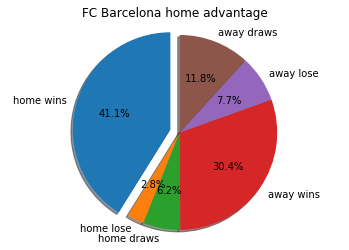

In [19]:
wins_home = results.where(results._c37=='FC Barcelona').where(results.results=='home')
wins_away = results.where(results._c6=='FC Barcelona').where(results.results=='away')
loss_home = results.where(results._c37=='FC Barcelona').where(results.results=='away')
loss_away = results.where(results._c6=='FC Barcelona').where(results.results=='home')
draws_home = results.where(results._c37=='FC Barcelona').where(results.results=='draw')
draws_away = results.where(results._c6=='FC Barcelona').where(results.results=='draw')

labels= 'home wins','home lose','home draws','away wins','away lose','away draws'
sizes = [wins_home.count(),loss_home.count(),draws_home.count(),wins_away.count(),loss_away.count(),draws_away.count()]

explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = p.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
p.title('FC Barcelona home advantage')
p.show()

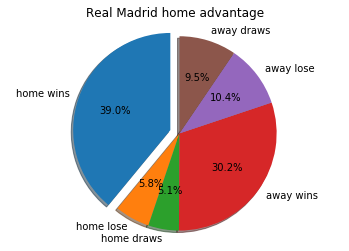

In [20]:
wins_home = results.where(results._c37=='Real Madrid').where(results.results=='home')
wins_away = results.where(results._c6=='Real Madrid').where(results.results=='away')
loss_home = results.where(results._c37=='Real Madrid').where(results.results=='away')
loss_away = results.where(results._c6=='Real Madrid').where(results.results=='home')
draws_home = results.where(results._c37=='Real Madrid').where(results.results=='draw')
draws_away = results.where(results._c6=='Real Madrid').where(results.results=='draw')

labels= 'home wins','home lose','home draws','away wins','away lose','away draws'
sizes = [wins_home.count(),loss_home.count(),draws_home.count(),wins_away.count(),loss_away.count(),draws_away.count()]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = p.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
p.title('Real Madrid home advantage')
p.show()

In [21]:
#sub_results1 = sub_results1.select(sub_results1._c5,sub_results1._c6,functions.substring(sub_results1._c29,-4,4).alias('_c29'),sub_results1._c30,sub_results._c37,sub_results1._c36)
#sub_results2 = sub_results2.select(sub_results2._c5,sub_results1._c6,functions.substring(sub_results2._c29,-4,4).alias('_c29'),sub_results2._c30,sub_results._c37,sub_results2._c36)
#sub_results1.show()

sub_results1 = sub_results1.select(sub_results1._c5,sub_results1._c6,sub_results1._c64,sub_results1._c30,sub_results1._c37,sub_results1._c36)
sub_results2 = sub_results2.select(sub_results2._c5,sub_results2._c6,sub_results2._c64,sub_results2._c30,sub_results2._c37,sub_results2._c36)
sub_results3 = sub_results3.select(sub_results3._c5,sub_results3._c6,sub_results3._c64,sub_results3._c30,sub_results3._c37,sub_results3._c36)
sub_results4 = sub_results4.select(sub_results4._c5,sub_results4._c6,sub_results4._c64,sub_results4._c30,sub_results4._c37,sub_results4._c36)

In [22]:
fcb_home = sub_results1.groupby(sub_results1._c64).agg(functions.sum(sub_results1._c36).alias('_c36')).orderBy('_c64')
#fcb_home.show()
fcb_away = sub_results2.groupby(sub_results2._c64).agg(functions.sum(sub_results2._c36).alias('_c36')).orderBy('_c64')
#fcb_away.show()
rm_home = sub_results3.groupby(sub_results3._c64).agg(functions.sum(sub_results3._c36).alias('_c36')).orderBy('_c64')
#rm_home.show()
rm_away = sub_results4.groupby(sub_results4._c64).agg(functions.sum(sub_results4._c36).alias('_c36')).orderBy('_c64')
#rm_away.show()

In [23]:
a = []
b = []
c = []
d = []
e = []
x1 = fcb_away.select(fcb_away._c64).collect()
x2 = fcb_away.select(fcb_away._c36).collect()
x3 = fcb_home.select(fcb_home._c36).collect()
x4 = rm_away.select(rm_away._c36).collect()
x5 = rm_home.select(rm_home._c36).collect()
for i in range(0,fcb_away.count()):
    a.append(str(x1[i][0]))
    b.append(int(x2[i][0]))
    c.append(int(x3[i][0]))
    d.append(int(x4[i][0]))
    e.append(int(x5[i][0]))

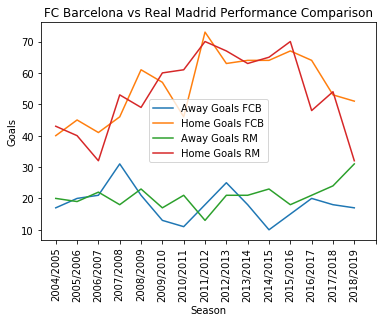

In [28]:
import matplotlib.pyplot as plt
z = [i for i in range(0,16)]
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)
plt.plot(a,e)
plt.xticks(z, a, rotation='vertical')
plt.legend(['Away Goals FCB','Home Goals FCB','Away Goals RM','Home Goals RM'])
plt.title('FC Barcelona vs Real Madrid Performance Comparison')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

In [281]:
players_data = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_20.csv')
#players_data.show(n=3)
cc = spark.read.csv('Downloads/countryContinent.csv')
cc = cc.select('_c0','_c5')

In [282]:
players_a = players_data.select('_c4','_c6','_c7','_c8','_c20') #c8 is nationality, c20 is body type
nationalities_agg = players_data.select('_c8').distinct()
nationalities_agg = nationalities_agg.join(cc, nationalities_agg._c8 == cc._c0).drop('_c0')
players_a = players_a.join(nationalities_agg, players_a._c8 == nationalities_agg._c8).drop('_c8')
nationalities_agg = players_a.select('_c5').distinct()
l = nationalities_agg.collect()
country_list = {}
for i in range(0,len(l)):
    country_list.update({l[i][0]:str(i+1)})

In [283]:
#body_type = players_data.select('_c20').distinct()
players_a = players_a.withColumn('_c20',\
                                   functions.when((functions.col('_c20') == 'Lean'),3)\
                                   .when((functions.col('_c20') == 'Normal'),2)\
                                    .when((functions.col('_c20') == 'Stocky'),1)\
                                   .otherwise(0))
# print(players_data.count())
# players_data = players_data.filter(players_data['_c20']!=0)
# print(players_data.count())

In [284]:
# players_data = players_data.withColumn('_c4',players_data['_c4'].cast(types.IntegerType())) #age
# players_data = players_data.withColumn('_c6',players_data['_c6'].cast(types.IntegerType())) #height
# players_data = players_data.withColumn('_c7',players_data['_c7'].cast(types.IntegerType())) #weight
players_a = players_a.replace(country_list,1,'_c5')
players_a = players_a.toPandas()
players_a.to_csv('cleaned.csv',index=False)

In [161]:
#pd_df._c8 = [country_list[item] for item in pd_df._c8]

####heatmap#####


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = pd.read_csv('cleaned.csv')
df = df[1:]

labels = ['age','height','weight','nationality','body type']

corr = df.corr().to_numpy().round(2)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr,cmap='RdBu_r') #possible: jet
cbar = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, corr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix")
fig.tight_layout()
plt.savefig('Downloads/myfig.png')


In [31]:
players_data = players_data.withColumn('_c4',players_data['_c4'].cast(types.IntegerType()))
players_data = players_data.filter(players_data._c4.isNotNull())
players_data_mean = players_data.agg(functions.mean('_c4').alias('mean_age')).collect()
mean_age = players_data_mean[0][0]

In [32]:
players_data = players_data.withColumn('OorY',\
                                       functions.when((functions.col('_c4') <= mean_age),'Y')\
                                       .otherwise('O'))
players_data = players_data.select('_c2','_c4','OorY','_c9')
#players_data.show()

In [34]:
players_agg = players_data.groupBy('_c9').agg(functions.count('OorY').alias('count_of_each_club'))
players_agg.show()
#players_agg.filter()

+--------------------+------------------+
|                 _c9|count_of_each_club|
+--------------------+------------------+
|       Côte d'Ivoire|                 7|
|          Göztepe SK|                28|
|CD Everton de Viñ...|                26|
|     Shonan Bellmare|                 2|
|        Salford City|                28|
|        FC Voluntari|                27|
|              Russia|                10|
|  1. FC Union Berlin|                33|
|            Paraguay|                 9|
|          Sagan Tosu|                30|
|           Puebla FC|                27|
|  Argentinos Juniors|                28|
|     SC Paderborn 07|                33|
|       Karlsruher SC|                28|
|     Cheltenham Town|                24|
|         SC Freiburg|                31|
|San Lorenzo de Al...|                28|
|  SpVgg Unterhaching|                28|
|Universidad Católica|                28|
|           FC Luzern|                25|
+--------------------+------------

In [35]:
sr_1 = sub_results1.select('_c37')
pd_1 = players_data.select('OorY','_c9')
match_players = pd_1.join(sr_1, pd_1._c9 == sr_1._c37).drop('_c37')

sr_2 = sub_results3.select('_c37')
match_players2 = pd_1.join(sr_2, pd_1._c9 == sr_2._c37).drop('_c37')

In [36]:
#match_players.show()
match_players_agg = match_players.groupBy('OorY').agg(functions.count('OorY')).collect()
match_players_agg2 = match_players2.groupBy('OorY').agg(functions.count('OorY')).collect()
young1 = match_players_agg[0][1]
old1 = match_players_agg[1][1]
young2 = match_players_agg2[0][1]
old2 = match_players_agg2[1][1]

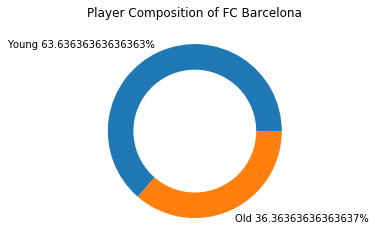

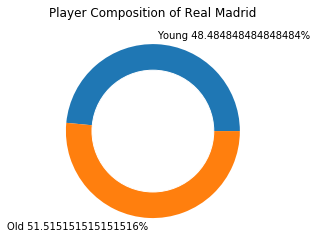

In [37]:
# library
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
 
# create data
labels=['Young ' + str(young1/(young1+old1)*100) + '%' ,'Old ' + str(old1/(young1+old1)*100) + '%']
size_of_groups=[young1,old1]

# Create a pieplot
plt.pie(size_of_groups,labels=labels)
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Player Composition of FC Barcelona') 
plt.show()

labels=['Young ' + str(young2/(young2+old2)*100) + '%' ,'Old ' + str(old2/(young2+old2)*100) + '%']
size_of_groups=[young2,old2]
plt.pie(size_of_groups,labels=labels)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Player Composition of Real Madrid') 
plt.show()


In [38]:
fcb_rm = results.where( ((results._c6=='FC Barcelona')&(results._c37=='Real Madrid')) | ((results._c6=='Real Madrid')&(results._c37=='FC Barcelona')) )
fcb_won = fcb_rm.where(((fcb_rm._c6=='FC Barcelona')&(fcb_rm.results=='away'))|((fcb_rm._c37=='FC Barcelona')&(fcb_rm.results=='home')))
rm_won = fcb_rm.where((fcb_rm._c6=='Real Madrid')&(fcb_rm.results=='away')|((fcb_rm._c37=='Real Madrid')&(fcb_rm.results=='home')))
fcb_rm_draw = fcb_rm.where(fcb_rm.results=='draw')

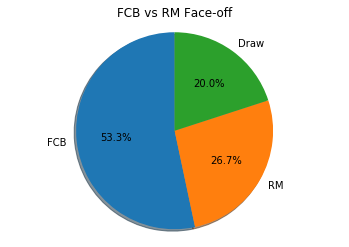

In [42]:
import matplotlib.pyplot as p
labels= 'FCB','RM','Draw'
sizes = [fcb_won.count(),rm_won.count(),fcb_rm_draw.count()]
fig1, ax1 = p.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
p.title('FCB vs RM Face-off')
p.show()

In [43]:
players_data = players_data.where(players_data['_c9'].isin(all_teams))

In [46]:
players_data.show(n=3)

+------------+---+----+---------------+
|         _c2|_c4|OorY|            _c9|
+------------+---+----+---------------+
|    L. Messi| 32|   O|   FC Barcelona|
|   E. Hazard| 28|   O|    Real Madrid|
|K. De Bruyne| 28|   O|Manchester City|
+------------+---+----+---------------+
only showing top 3 rows

